In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

Matplotlib created a temporary cache directory at /scratch/naotok/13419516/matplotlib-ohvjpqmd because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# PCA

## Load TPM matrix

In [ ]:
# Jul24
tpm_matrix_jul24_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/expression/TPM.txt", sep = "\t")
tpm_matrix_jul24_df = tpm_matrix_jul24_df.set_index("gene_name")
tpm_matrix_jul24_WT_df = tpm_matrix_jul24_df[[x for x in tpm_matrix_jul24_df.columns if "WT_" in x]]
tpm_matrix_jul24_KO_df = tpm_matrix_jul24_df[[x for x in tpm_matrix_jul24_df.columns if "KO_" in x]]
tpm_matrix_jul24_df.head()

,WT_F_1,WT_F_2,WT_F_3,KO_F_1,KO_M_3,KO_M_4
gene_name,,,,,,
ENSMUSG00000000001,148.51,162.19,93.35,138.35,207.90,153.99
ENSMUSG00000000003,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028,12.14,12.34,14.81,10.39,13.46,7.98
ENSMUSG00000000031,0.00,0.00,1.60,0.13,0.00,0.09
ENSMUSG00000000037,0.50,1.47,0.31,0.87,1.32,0.93


In [3]:
tpm_matrix_jul24_df.corr()

,WT_F_1,WT_F_2,WT_F_3,KO_F_1,KO_M_3,KO_M_4
WT_F_1,1.000000,0.994537,0.937281,0.991980,0.957489,0.991724
WT_F_2,0.994537,1.000000,0.927341,0.982293,0.961526,0.991237
WT_F_3,0.937281,0.927341,1.000000,0.934638,0.829930,0.906528
KO_F_1,0.991980,0.982293,0.934638,1.000000,0.953036,0.986134
KO_M_3,0.957489,0.961526,0.829930,0.953036,1.000000,0.960192
KO_M_4,0.991724,0.991237,0.906528,0.986134,0.960192,1.000000


## Plot

In [4]:
gene_id_name_df = pd.read_csv("/rhome/naotok/bigdata/genome_annotation/Mouse/Mus_musculus.GRCm38.102.exon.info.tsv", sep = "\t", usecols = ["gene_id", "gene_name"])
gene_id_name_df = gene_id_name_df.drop_duplicates()
gene_id_name_dict = dict(zip(gene_id_name_df["gene_id"], gene_id_name_df["gene_name"]))

In [5]:
tpm_matrix_jul24_melt_df = tpm_matrix_jul24_df.reset_index().melt(id_vars = "gene_name", var_name = "sample", value_name = "TPM")
tpm_matrix_jul24_melt_df["group"] = tpm_matrix_jul24_melt_df["sample"].map(lambda x: x.split("_")[0]).map(lambda x: "Control" if x == "WT" else "cKO")
tpm_matrix_jul24_melt_df = tpm_matrix_jul24_melt_df.rename(columns = {"gene_name": "gene_id"})
tpm_matrix_jul24_melt_df["gene_name"] = tpm_matrix_jul24_melt_df["gene_id"].map(gene_id_name_dict)
tpm_matrix_jul24_melt_df

,gene_id,sample,TPM,group,gene_name
0,ENSMUSG00000000001,WT_F_1,148.51,Control,Gnai3
1,ENSMUSG00000000003,WT_F_1,0.00,Control,Pbsn
2,ENSMUSG00000000028,WT_F_1,12.14,Control,Cdc45
3,ENSMUSG00000000031,WT_F_1,0.00,Control,H19
4,ENSMUSG00000000037,WT_F_1,0.50,Control,Scml2
...,...,...,...,...,...
332917,ENSMUSG00000118655,KO_M_4,0.16,cKO,AC156032.1
332918,ENSMUSG00000118656,KO_M_4,0.00,cKO,BX681418.1
332919,ENSMUSG00000118657,KO_M_4,0.00,cKO,AL606917.1
332920,ENSMUSG00000118658,KO_M_4,0.00,cKO,CT485612.1


/scratch/naotok/13419516/ipykernel_2418340/2190980372.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.catplot(
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


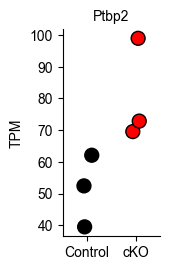

In [ ]:
g = sns.catplot(
    data = tpm_matrix_jul24_melt_df,
    x = "group",
    order = ["Control", "cKO"],
    y = "TPM",
    col = "gene_name",
    col_order = ["Ptbp2"],
    palette = ["black", "red"],
    height = 3,
    aspect = 0.6,
    s = 100,
    edgecolor = "black",
    linewidth = 1
)
g.set_titles("{col_name}")
g.set_axis_labels("", "TPM")
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/TPM_PTBP2_catplot.png", bbox_inches = "tight", dpi = 800)